In [ ]:
import sys
sys.path.insert(0, '..')
import pandas as pd

df_acc_train = pd.read_csv('./results/logs_SMNET_POISSON_train.csv')
df_acc_test = pd.read_csv('./results/logs_SMNET_POISSON_val.csv')

df_loss_train = pd.read_csv('./results/logs_SMNET_POISSON_train_loss.csv')
df_loss_test = pd.read_csv('./results/logs_SMNET_POISSON_val_loss.csv')

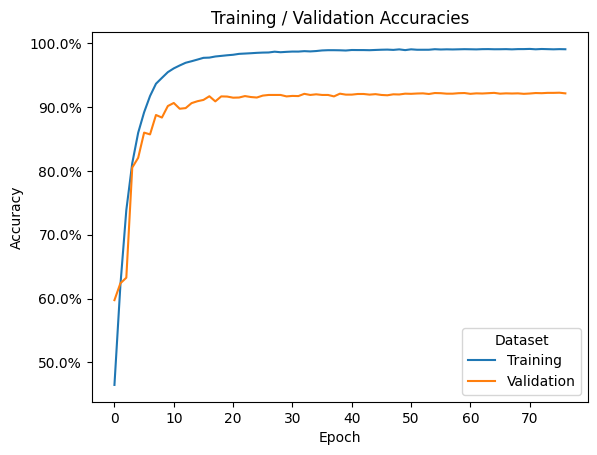

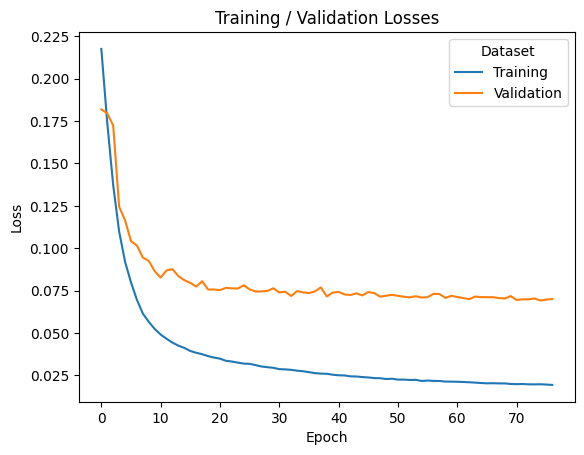

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.lineplot(data=df_acc_train, x='Step', y='Value', label='Training')
sns.lineplot(data=df_acc_test, x='Step', y='Value', label='Validation')

formatter = FuncFormatter(lambda x, _: f'{x*100:.1f}%')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Training / Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(title='Dataset')
plt.show()

sns.lineplot(data=df_loss_train, x='Step', y='Value', label='Training')
sns.lineplot(data=df_loss_test, x='Step', y='Value', label='Validation')

plt.title('Training / Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(title='Dataset')
plt.show()

In [25]:
from src.models.jelly import SimpleSpikingMNET
import torch


model = SimpleSpikingMNET((1, 224, 224), 3, 5, 'poisson')
checkpoint = torch.load('./logs/SMNET_POISSON/best_model.pth', map_location='cpu', weights_only=True)
model.load_state_dict(checkpoint['net'])
model.eval()

SimpleSpikingMNET(
  (encoder): PoissonEncoder()
  (block1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), step_mode=m)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, step_mode=m)
    (2): LIFNode(
      v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=m, backend=torch, tau=2.0
      (surrogate_function): ATan(alpha=2.0, spiking=True)
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False, step_mode=m)
  )
  (block2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), step_mode=m)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, step_mode=m)
    (2): LIFNode(
      v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=m, backend=torch, tau=2.0
      (surrogate_function): ATan(alpha=2.0, spiking=True)
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False, step_mode=m)
  )
  (block3

In [50]:
from src.datasets.custom import CustomImageFolder

dataset = CustomImageFolder('../AROB-Breast-Datasets/data/cbis/lesions')

print('Dataset classes : {}'.format(dataset.class_to_idx))

for i in range(10):
    sample = dataset[i]
    img, label = sample[0], sample[1]
    preds = model(img).cpu()
    print('Target : {} | Prediction : {}'.format(label, preds))

Dataset classes : {'calcification': 0, 'mass': 1}
Target : 0 | Prediction : tensor([[-0.0299,  0.8818,  0.1458]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1887, 0.7271, 0.0795]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.0938, 0.8517, 0.0528]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.0890, 0.8752, 0.0332]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1492, 0.7063, 0.1416]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1004, 0.8755, 0.0254]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1659, 0.7617, 0.0732]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1129, 0.7724, 0.1110]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.0604, 0.8816, 0.0563]], grad_fn=<MeanBackward1>)
Target : 0 | Prediction : tensor([[0.1132, 0.8313, 0.0547]], grad_fn=<MeanBackward1>)
